# A illustration of SNP-BLUP with Julia

## Introduction

In this section, I will illustrate how easy it is to do SNP-BLUP with Julia.

## The model

Suppose there are $n$ SNP/loci that can be genotyped. Then the phenotype of individual $i$ can be modeled as:

$$y_i = \mu + \sum_{j=1}^nm_{ij} + \varepsilon_i$$

We firstly load some packages to do the simulation and calculation.

In [3]:
using LinearAlgebra
using Random        # randperm
using Statistics    # mean, var
using Plots

## Simulation

In [4]:
# parameters for the simulation
nlc, nid, nqtl, h² = 2000, 1000, 300, .5 # can be in 4 lines on your taste

(2000, 1000, 300, 0.5)

In [11]:
# Simulation of genotypes, QTL, TBV, phenotypes
trng = rand([0, 1, 1, 2.], nlc, nid)
lqtl = sort(randperm(nlc)[1:nqtl])
eqtl = randn(nqtl) ./ nqtl
qsnp = view(trng, lqtl, :)
tbv  = qgt'lqtl
va   = var(tbv)
ve   = va / h² * (1 - h²)
err = randn(nid) * sqrt(ve)
pht = tbv + err;

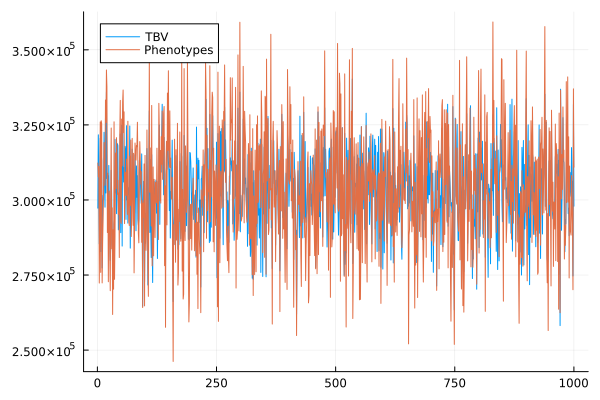

In [12]:
plot(tbv, label = "TBV")
plot!(pht, label = "Phenotypes")

## SNP-BLUP

In [ ]:
# LHS